In [1]:
import pandas as pd
from utils import *
from joint_angles.calculate_joint_angles import *

%load_ext autoreload
%autoreload 2

In [2]:
data_path = "../data/small_data/pose_saved.csv"
data = pd.read_csv(data_path)
print(data.dtypes)
data.head()

rgb_frameid     int64
kp3ds          object
kp2ds          object
bboxes         object
dtype: object


,rgb_frameid,kp3ds,kp2ds,bboxes
0,5000,"[[2433.527603034382, -1938.5729978558697, 65.7...","[[[1008.9975321765137, 101.44294880551615, 0.7...","[[743.9833984375, 0.0, 1234.8826904296875, 622..."
1,5001,"[[2446.607236443355, -1934.9092386957425, 67.5...","[[[999.6039120528574, 99.06533975351539, 0.758...","[[740.1781616210938, 0.0, 1231.525390625, 622...."
2,5002,"[[2460.826163175043, -1930.3790846162383, 69.3...","[[[992.6256386363831, 97.69814209614634, 0.727...","[[736.6728515625, 0.089996337890625, 1228.7199..."
3,5003,"[[2473.6984260388895, -1926.4497944254015, 73....","[[[985.1741546289431, 95.75803250340277, 0.752...","[[734.6681518554688, 0.10302734375, 1223.74499..."
4,5004,"[[2489.1893336653734, -1925.6113847420506, 73....","[[[978.2528523690814, 95.23409782663788, 0.765...","[[733.6686401367188, 0.173248291015625, 1216.8..."


### Let's only take the first two columns


In [3]:
df = data[['rgb_frameid', 'kp3ds']]
df.head()

,rgb_frameid,kp3ds
0,5000,"[[2433.527603034382, -1938.5729978558697, 65.7..."
1,5001,"[[2446.607236443355, -1934.9092386957425, 67.5..."
2,5002,"[[2460.826163175043, -1930.3790846162383, 69.3..."
3,5003,"[[2473.6984260388895, -1926.4497944254015, 73...."
4,5004,"[[2489.1893336653734, -1925.6113847420506, 73...."


In [4]:
print(type(df.kp3ds[0]))
df.kp3ds[0]

<class 'str'>


'[[2433.527603034382, -1938.5729978558697, 65.77853319876616, 0.715919840335846], [2455.1936794872177, -1931.8907779942238, 97.20523561103043, 0.6419889330863953], [2413.1285141606477, -1915.3594788777505, 100.405452670196, 0.6129101574420929], [2553.3050698424627, -1851.7950717623419, 114.90635783137866, 0.7434812635183334], [2406.47320246087, -1791.7937153377102, 130.30197906455479, 0.58548554033041], [2645.352619537392, -1677.0320842443841, -34.92217267652428, 0.721489417552948], [2305.953153691892, -1832.9165705828136, -22.7491032373318, 0.675788402557373], [2713.5425084514063, -1596.1945567660148, -283.31397363860276, 0.6877377976973852], [2205.742184616739, -2043.9587716844408, -78.7145570247363, 0.6339661717414856], [2746.769581107897, -1777.5664535076626, -405.71990057299956, 0.6417463049292564], [2196.6960493973734, -2288.6940364719085, -26.30439482351236, 0.7618403911590577], [2601.681535535075, -1730.8660615202673, -554.1895844242209, 0.642460686819894], [2415.360061812779, 

### Let's convert the string into vector

In [5]:
df['kp3ds'] = df['kp3ds'].apply(str2float)
df['kp3ds']

/var/folders/_q/5gxcvv9j1dg_pzh17qyfbkk40000gn/T/ipykernel_38755/1860301907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kp3ds'] = df['kp3ds'].apply(str2float)


0       [[2433.527603034382, -1938.5729978558697, 65.7...
1       [[2446.607236443355, -1934.9092386957425, 67.5...
2       [[2460.826163175043, -1930.3790846162383, 69.3...
3       [[2473.6984260388895, -1926.4497944254015, 73....
4       [[2489.1893336653734, -1925.6113847420506, 73....
                              ...                        
4995    [[2783.777098030839, -480.39212498854664, -45....
4996    [[2786.0874771535578, -479.94158441571295, -46...
4997    [[2791.0247204375196, -479.5124704274368, -46....
4998    [[2793.123929938673, -480.28451711442835, -46....
4999    [[2799.4689841766367, -479.83214699544794, -46...
Name: kp3ds, Length: 5000, dtype: object

### Let's separate each kp3ds line into columns for each body points, and remove kp3ds column

In [6]:
df_points = get_df_points(df)
df_points.head(2)

,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


In [7]:
df = pd.concat([df, df_points], axis=1)
df.drop(columns=['kp3ds'], inplace=True)
df.head(3)


,rgb_frameid,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,5000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,5001,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."
2,5002,"[2460.826163175043, -1930.3790846162383, 69.34...","[2484.918090524629, -1924.8040044837676, 99.79...","[2440.8411861266345, -1900.254950299179, 104.3...","[2584.0739331874606, -1851.960169894501, 113.9...","[2435.4652524619855, -1776.6510228370694, 132....","[2684.776549436161, -1687.3026095059545, -43.6...","[2329.3454519494003, -1808.3264969982044, -19....","[2743.056079751839, -1614.688905862936, -304.6...","[2195.1750290174386, -2006.137971398989, -65.8...","[2755.032244545425, -1812.6779647475068, -409....","[2206.279819898573, -2244.3941945026313, -3.28...","[2619.789612932464, -1751.2821608695785, -572....","[2427.258121931534, -1746.360628016013, -587.8...","[2695.004890749521, -1794.4201805342605, -942....","[2404.6687226515774, -1789.2744484614768, -100...","[2769.543079408299, -1809.2850525834021, -1367...","[2415.272491615325, -1700.7187023871097, -1364..."


#### The framerate is 30 FPS, let's convert the frameid column into time

In [8]:
df['rgb_frameid'] = (df['rgb_frameid'] - 5000)/30
df.rename(columns={'rgb_frameid': 'time'}, inplace=True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


### Placement of 3D body points
<a href=https://github.com/open-mmlab/mmpose/tree/main/projects/rtmpose><img src="https://user-images.githubusercontent.com/13503330/245036409-2417e4f7-2203-468f-bad0-e7a6a6bf8251.jpg"  width="150" height="300">

![alt text](img/3d_body_points_axes.jpeg "Title")

#### Which one is left/right ?
At the beginning of the video, the participants right foot has the lowest x value. By taking a look at points 15 and 16 x values, the **point 16** corresponds to the **right** foot.

From this information, we can better precise the column names in our dataset.

In [9]:
df.rename(columns = {'point_5':'leftshoulder', 'point_6':'rightshoulder', 
                     'point_8':'rightelbow', 'point_7':'leftelbow', 
                     'point_10':'rightwrist', 'point_9':'leftwrist',
                     'point_12':'righthip', 'point_11':'lefthip'}, inplace = True)
df.head(2)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,leftwrist,rightwrist,lefthip,righthip,point_13,point_14,point_15,point_16
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...","[2746.769581107897, -1777.5664535076626, -405....","[2196.6960493973734, -2288.6940364719085, -26....","[2601.681535535075, -1730.8660615202673, -554....","[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....","[2750.7631518119424, -1794.6567370184462, -407...","[2201.630793546887, -2268.631210247707, -14.05...","[2610.394828575268, -1748.6124215080272, -551....","[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366..."


## Events selection in video

Let's assume that the picking event begins when subject looks at the object of interest

In [10]:
events = {'picking_r' : [[6, 7], [132.5, 134.5]],
          'cutting' : [[149, 169]],
          'stirring' : [[]]}


It seems like that our participant is right-handed.

## Intermediary features

### Get angles 

At first, I just tried to get the angles between 2 vectors (for example shoulder-elbow and wrist-elbow) to define it as the "angle joint". But then I realized that one can not just do that, since it will be then not sufficient to define the flexion, ab/adduction etc. 

I went back to read some literature on how to define joint angles based on 3D body points, and found some interesting references :
- [Method to estimate joint angles + code](https://temugeb.github.io/python/motion_capture/2021/09/16/joint_rotations.html)
It explains how to find joint angles based on basic body pose (T-pose)
- [This paper](https://www.nature.com/articles/s41591-022-02045-1#Sec9) explains that joint angles can be extracted in 3 d.o.f for each joint, by following the International Society of Biomechanics recommendations for Euler angle extractions of X (abduction/adduction), Y (internal/external rotation) and Z (flexion/extension).
- [This paper](https://www.rachelvitali.com/docs/Determining%20anatomical%20frames%20via%20inertial%20motion%20capture%20-%20a%20survey%20of%20methods.pdf) says that there are different methods used to define anatomical frames of reference for inertial motion capture.

--> So I should come up myself with a method to define the anatomical frame of reference.

**Here is my method to try to express the joint angles in every anatomical plane :**

1. Find a way to define body coordinates in order to easily select the anatomical planes (try reproduce the body coordinates as shown below in the picture)
2. Find a way to create the rotation matric that rotates the usual coordinate system to the body coordinates
3. Find a way to express the 3D point into body coordinates s.t. one can easily select the plane (for ex. Z-X plane for sagittal plane) to then compute the angle

<a href = "https://en.wikipedia.org/wiki/Anatomical_plane"><img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Human_anatomy_planes%2C_labeled.svg/1200px-Human_anatomy_planes%2C_labeled.svg.png" width = 200/></a>

#### 1. Body coordinates system definition
Origin is at the middle of the hip joints

Z-axis : From origin to middle of shoulder joints

Y-axis : From origin to right hip joint

X-axis : Perpendicular to Z and Y, in head direction (point_0)
--> Take point_0, put same z coordinate as middle of hip

From [this method](https://temugeb.github.io/python/motion_capture/2021/09/16/joint_rotations.html), lets define the neutral body pose such as this : <img src = 'https://github.com/TemugeB/temugeb.github.io/blob/main/_posts/images/tpose.png?raw=true' widht = 10>

In [11]:
#We don't need the points around the head to calculate the joint angles
new_df = np.array(df.drop(columns=['time', 'point_0', 'point_1', 'point_2', 'point_3', 'point_4']))

#Code from elsewhere

#rotate to orient the pose better
R = get_R_z(np.pi/2)
# number of frames
for framenum in range(new_df.shape[0]):
    #number of points
    for pt_num in range(new_df.shape[1]):
        new_df[framenum, pt_num] = R @ new_df[framenum, pt_num]

kpts = convert_to_dictionary(new_df)
add_hips_and_neck(kpts)
filtered_kpts = median_filter(kpts)
get_bone_lengths(filtered_kpts)
get_base_skeleton(filtered_kpts)
calculate_joint_angles(filtered_kpts)

In [12]:
keys = ['hips_angles', 'leftshoulder_angles', 'rightshoulder_angles', 'leftelbow_angles', 'rightelbow_angles']
for key in keys:
    joint_angles = pd.DataFrame(filtered_kpts[key])
    #to remove the "_angles"
    df[key] = np.array(joint_angles.apply(np.array,1))*180/np.pi

df.rename(columns={'hips_angles' : 'trunk_angles'}, inplace = True)
df.head(3)

,time,point_0,point_1,point_2,point_3,point_4,leftshoulder,rightshoulder,leftelbow,rightelbow,...,righthip,point_13,point_14,point_15,point_16,trunk_angles,leftshoulder_angles,rightshoulder_angles,leftelbow_angles,rightelbow_angles
0,0.000000,"[2433.527603034382, -1938.5729978558697, 65.77...","[2455.1936794872177, -1931.8907779942238, 97.2...","[2413.1285141606477, -1915.3594788777505, 100....","[2553.3050698424627, -1851.7950717623419, 114....","[2406.47320246087, -1791.7937153377102, 130.30...","[2645.352619537392, -1677.0320842443841, -34.9...","[2305.953153691892, -1832.9165705828136, -22.7...","[2713.5425084514063, -1596.1945567660148, -283...","[2205.742184616739, -2043.9587716844408, -78.7...",...,"[2415.360061812779, -1740.6648141592275, -579....","[2679.9952724415434, -1787.690377703567, -936....","[2400.8627281541926, -1778.5203763504858, -100...","[2756.2899011781155, -1799.6261441022816, -135...","[2414.4655146949895, -1684.1135292174695, -136...","[-156.3071409585956, 84.10757467315167, -103.2...","[-65.35052557971933, -6.067987861112847, 9.448...","[14.754037799458501, 5.47330924638175, 40.5281...","[-27.71587646697186, 16.76805966932435, -61.71...","[-24.047135031774356, -5.372450490608802, 24.8..."
1,0.033333,"[2446.607236443355, -1934.9092386957425, 67.53...","[2467.2217900211476, -1930.3347251724365, 97.9...","[2428.116065842915, -1907.5241451478714, 101.8...","[2569.8145999447324, -1852.6092353611177, 115....","[2422.253575661983, -1782.1572547434125, 129.7...","[2665.6696670464685, -1679.922232055294, -38.2...","[2318.2960842243237, -1820.4548819188512, -18....","[2725.426330672456, -1602.0102743236503, -296....","[2208.9420826541023, -2023.5744809148555, -71....",...,"[2419.367793916796, -1747.9863605084934, -570....","[2687.5016372386776, -1798.4410208952943, -933...","[2400.7339061752123, -1788.0900152347378, -100...","[2760.4205598737426, -1799.6442142374067, -135...","[2415.447631110754, -1698.3153128577876, -1366...","[-175.28366682748134, 82.48075121466773, -91.5...","[-67.51159954100784, -7.384462023211777, 11.03...","[15.3400378492211, 5.288338736318286, 37.85600...","[-30.464382174507165, 18.896741612105956, -62....","[-22.416093504866875, -5.9151154925629355, 29...."
2,0.066667,"[2460.826163175043, -1930.3790846162383, 69.34...","[2484.918090524629, -1924.8040044837676, 99.79...","[2440.8411861266345, -1900.254950299179, 104.3...","[2584.0739331874606, -1851.960169894501, 113.9...","[2435.4652524619855, -1776.6510228370694, 132....","[2684.776549436161, -1687.3026095059545, -43.6...","[2329.3454519494003, -1808.3264969982044, -19....","[2743.056079751839, -1614.688905862936, -304.6...","[2195.1750290174386, -2006.137971398989, -65.8...",...,"[2427.258121931534, -1746.360628016013, -587.8...","[2695.004890749521, -1794.4201805342605, -942....","[2404.6687226515774, -1789.2744484614768, -100...","[2769.543079408299, -1809.2850525834021, -1367...","[2415.272491615325, -1700.7187023871097, -1364...","[176.50024574467085, 85.79969500008363, -89.16...","[-68.05919743430395, -7.1609873284539445, 10.5...","[14.310090315744985, 4.75483386463454, 36.6014...","[-29.957883718561263, 19.304924529493793, -64....","[-22.110321955397666, -7.363593270355689, 36.4..."


### Get angle velocities
Let's estimate the angular velocity of the right shoulder when the participant is picking the knife (flexion movement --> x axis)

In [13]:
w_shoulder_flex, std = angle_velocity(df, 6, 7, name ='rightshoulder_angles', axis = 0)
print(f'The participant does the shoulder flexion movement at {w_shoulder_flex:.2f} deg/s with std of {std:.2f} when picking a knife.')

The participant does the shoulder flexion movement at 41.07 deg/s with std of 37.84 when picking a knife.


Let's estimate the same angular velocity but when the participant does not move its shoulder

In [14]:
w1_shoulder_flex, std1 = angle_velocity(df, 70, 71, name='rightshoulder_angles', axis = 0)
print(f'The participant does the shoulder flexion movement at {w1_shoulder_flex:.2f} deg/s with std of {std1:.2f} when doing nothing with the right shoulder')

The participant does the shoulder flexion movement at 2.15 deg/s with std of 1.61 when doing nothing with the right shoulder


### Trajectory distance and duration

#### In what unit are the axises expressed to ? meters ? centimeters ?
Let's first try to look at the height of the person (point_1 to point_16)

In [15]:
a = df['point_1'][0]
b = (df['point_15'][0] + df['point_16'][0])/2
height = np.linalg.norm(a-b)
print(f'The person height (up to the nose) is {height:.2f}.') 

The person height (up to the nose) is 1472.17.


Looks like it is in millimeter, if we assume that the person measures ~1.47m from the feet to the nose level. 
Knowing this, the room experiment should have the following dimensions : 2m(width) x 5m(length) x 2m (height).

But this is not representative to the reality since the real dimensions of the labs are 2,37m(width) x 2,8m(length) ([from EPFL website](https://plan.epfl.ch/s/YQZs))

Maybe the resulting space grid does not really represent the real labs room dimension. But there is no way for now to come up with the real dimensions. Which is not really troublesome for now since we do not really look at the real distance measured at the end for our analysis.

NOTE : The algorithm that produces the 3D body points does not really seems okay, the resulting bodys does not turn to the right side. (ex. 0'00 and 2'34). Could be a problem if one wants to compute the trunk rotation

Lets look at the distance traveled by the right wrist when the person picks up the knife

In [16]:
distance = dist_trajectory(df, 6, 7, 'rightwrist')
time = time_trajectory(df, 6, 7)
print(f'The wrist traveled {distance:.2f} [cm or something] for {time:.2f} seconds when the person picks up a knife')


The wrist traveled 692.76 [cm or something] for 1.00 seconds when the person picks up a knife


### Distance A-B length and duration
Let's look at the straight line distance at the start and end of the picking knife action for the right wrist.

In [17]:
distance_ab = distance_AB(df, 6, 7, 'rightwrist')
print(f'The straight line is about {distance_ab:.2f} [cm or something] for {time:.2f} seconds for picking a knife')

The straight line is about 676.37 [cm or something] for 1.00 seconds for picking a knife


## Final features

### Get joint angles


#### 2.1 Shoulder flexion/extension
The angle is computed between the vector shoulder-elbow and shoulder-hip on sagittal plane.

<a href="https://physicaltherapyweb.com/hyper-extension-internal-rotation-heri-test/"><img src ="https://i0.wp.com/physicaltherapyweb.com/wp-content/uploads/2016/08/shoulder-flexion-and-extension.png?fit=329%2C410&ssl=1" width = 200/></a>

Let's choose a moment where the participant washes their hands, to target a moment where the shoulders only do flexion, with no abduction.



In [18]:
idx = time_id(df, 25, 25.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

750    [-86.53340115672587, 24.485221780564626, -25.9...
751    [-86.5094208406357, 24.39826946938556, -25.881...
752    [-87.25647936765927, 24.696146825207467, -25.8...
753    [-87.82808469526059, 24.670308011123794, -25.5...
754    [-88.1336700047575, 24.5721562043828, -25.3599...
755    [-89.710057607171, 24.14094294389585, -24.2597...
756    [-88.92248847835799, 24.150011407546145, -24.5...
757    [-88.24362344419207, 23.81319472675093, -24.53...
758    [-83.85039639108089, 24.806373969049726, -27.5...
759    [-80.13357356783246, 25.075153612059857, -29.6...
760    [-75.9924284916681, 25.657710767782792, -32.50...
761    [-72.7921645706241, 25.547729697467457, -34.19...
762    [-69.50953510340761, 25.76985606000901, -36.49...
763    [-66.1954930820279, 25.905319317491706, -38.87...
764    [-62.28601054460844, 26.07787742907245, -41.93...
Name: leftshoulder_angles, dtype: object

Let's choose another moment where the participant is unpacking the tomatoes

In [19]:
idx = time_id(df, 116, 116.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

3480    [-80.22152227459719, 25.964872065565814, -30.6...
3481    [-79.98352414783064, 25.964050352610723, -30.7...
3482    [-77.81903948812857, 26.241067684137835, -32.2...
3483    [-76.26983154254724, 25.72840673036767, -32.43...
3484    [-76.2133694975812, 25.886117215510847, -32.66...
3485    [-75.95840168046851, 25.56875057515039, -32.41...
3486    [-75.15306359588446, 25.691635410506763, -33.0...
3487    [-74.27386416645432, 25.501236703879513, -33.2...
3488    [-74.12153603611003, 25.70670878250754, -33.62...
3489    [-73.37949895493746, 25.956760873167664, -34.3...
3490    [-73.06746142364004, 25.946979116524027, -34.5...
3491    [-72.35689436008612, 25.95698480686009, -34.98...
3492    [-72.15394508159605, 25.67957080215001, -34.74...
3493    [-71.80744578693253, 25.641429718607775, -34.8...
3494    [-71.55508633625729, 25.329648801227375, -34.6...
Name: leftshoulder_angles, dtype: object

--> rotation around x-axis of human anatomical plan, as expected from extension movement

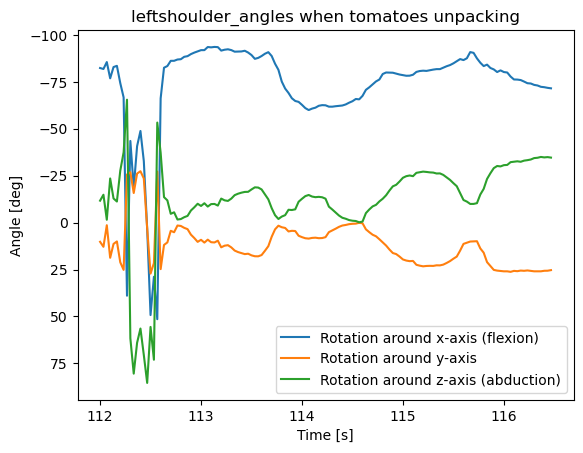

In [20]:
plot_angles(df, 112, 116.5, 'leftshoulder_angles', event = 'tomatoes unpacking')

#### 2.2 Shoulder ab/adduction
In coronal plan

<a href='https://www.researchgate.net/publication/342490010_An_ergonomic_shoulder_for_robot-aided_rehabilitation_with_hybrid_control'><img src = 'https://www.researchgate.net/publication/342490010/figure/fig1/AS:960277239566349@1605959343300/Schematic-of-shoulder-abduction-adduction-and-vertical-flexion-extension.png' width = 300></a>

Let's check when the participant reach to the tomatoes in the fridge

In [21]:
idx = time_id(df, 53, 53.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

1590    [-46.39840671370845, 15.245540834828267, -34.6...
1591    [-46.05519194998695, 15.328627913138842, -35.1...
1592    [-46.17486704625846, 15.358685201656744, -35.1...
1593    [-48.04124548645463, 14.777166224018186, -32.4...
1594    [-48.02149573155248, 14.63097006010683, -32.15...
1595    [-45.49133756650919, 15.166279095642077, -35.2...
1596    [-45.17439484601991, 14.961748587296135, -35.0...
1597    [-46.61969892249095, 14.855004693361163, -33.6...
1598    [-46.11400737781675, 14.705442965408267, -33.7...
1599    [-45.11366883929146, 15.058276827121146, -35.3...
1600    [-44.62063158891098, 15.231489167682836, -36.0...
1601    [-44.24375613834712, 15.285382106874287, -36.5...
1602    [-43.41330718410702, 15.288652906637239, -37.2...
1603    [-43.28160719993238, 15.299609289182147, -37.4...
1604    [-42.92127930243128, 15.221433360144102, -37.5...
Name: leftshoulder_angles, dtype: object

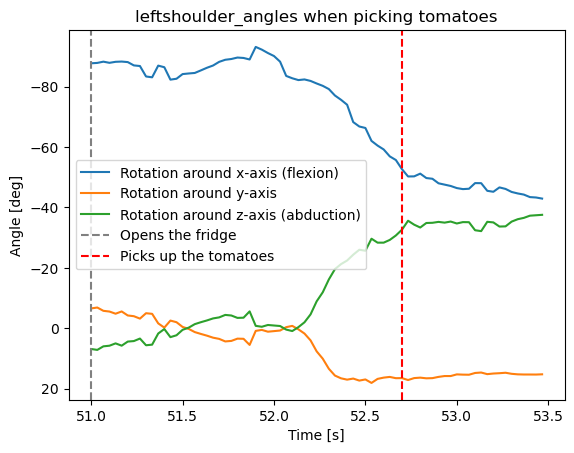

In [22]:
plot_angles(df, 51, 53.5, 'leftshoulder_angles', event = 'picking tomatoes', 
            vertical_line1 = True, label_vertical1 = 'Opens the fridge', x_vertical1 = 51,
            vertical_line2 = True, x_vertical2 = 52.7, label_vertical2='Picks up the tomatoes')

It is harder to completely isolate the abduction movement since in real world, human always do a mix of flexion/abduction movement. At least we can see some rotation around z-axis that correspond to the abduction movement.

Let's check with another moment when the participant checks the tomatoes

In [23]:
idx = time_id(df, 62, 62.5)
df['leftshoulder_angles'][idx[0]:idx[1]]

1860    [-44.17478203766572, 15.113642553447793, -36.2...
1861    [-44.373893166306274, 14.739943046485665, -35....
1862    [-44.915632626460294, 14.838698948062657, -34....
1863    [-46.43573622596801, 15.16000591339513, -34.46...
1864    [-47.3040725176673, 15.455787634298561, -34.43...
1865    [-47.59934916422994, 15.294759558368009, -33.8...
1866    [-48.65609517211061, 15.458097757134471, -33.4...
1867    [-49.387023134345185, 15.352399313021124, -32....
1868    [-50.412025415081025, 15.681539478163486, -32....
1869    [-51.16308624277566, 15.793919737284208, -32.3...
1870    [-51.190441769705664, 15.982609895484755, -32....
1871    [-52.347891862721966, 16.94018055365898, -33.7...
1872    [-53.54293091594642, 16.997008787475473, -32.9...
1873    [-55.02096605685672, 17.14474684751953, -32.28...
1874    [-55.71511460984821, 17.21896879300236, -31.97...
Name: leftshoulder_angles, dtype: object

#### 3. Elbow flexion/extension

From litterature, the elbow joint allows us to perform flexion–extension and pronation–supination movement.

<a href="https://www.researchgate.net/figure/Normal-range-of-motion-for-the-elbow-joint_fig2_319499390"><img src="https://www.researchgate.net/publication/319499390/figure/fig2/AS:1086484513857552@1636049502528/Normal-range-of-motion-for-the-elbow-joint.jpg" alt="Normal range of motion for the elbow joint." width = "300" height = "300"/></a>

But since in our dataset, the pronation-supination movement is not captured, the joint angle of the elbow simply corresponds to the flexion-extension movement.
ref : Zwerus, E. L., Willigenburg, N. W., Scholtes, V. A., Somford, M. P., Eygendaal, D., & van den Bekerom, M. P. (2019). Normative values and affecting factors for the elbow range of motion. Shoulder & elbow, 11(3), 215–224. https://doi.org/10.1177/1758573217728711


Let's take the moment when the subjet reach the tomatoes in the fridge, left hand on the fridge door


In [24]:
idx = time_id(df, 128.5, 129)
df['leftelbow_angles'][idx[0]:idx[1]]

3855    [24.486450043113635, -30.829616195321876, -103...
3856    [25.40523383574087, -31.51363944331685, -102.7...
3857    [26.642592053789855, -32.263608739572845, -101...
3858    [27.493774176702622, -32.56465992803683, -100....
3859    [27.175913365344396, -32.55651314067354, -100....
3860    [28.106820847881234, -33.09087400056888, -99.7...
3861    [30.54472385128707, -34.07046366107424, -96.58...
3862    [30.468042366874485, -33.77842051262641, -96.2...
3863    [30.72219958626668, -33.688553666089, -95.5608...
3864    [29.847137811130676, -33.13768043621882, -96.2...
3865    [30.325754993855085, -33.77264341691781, -96.4...
3866    [30.409502633570753, -33.74463298504347, -96.2...
3867    [30.969860268352846, -34.059250093919424, -95....
3868    [31.433558434107177, -34.25813639482942, -95.2...
3869    [31.78027189276065, -34.66778221194415, -95.26...
Name: leftelbow_angles, dtype: object

Elbow flexion/extension around z-axis

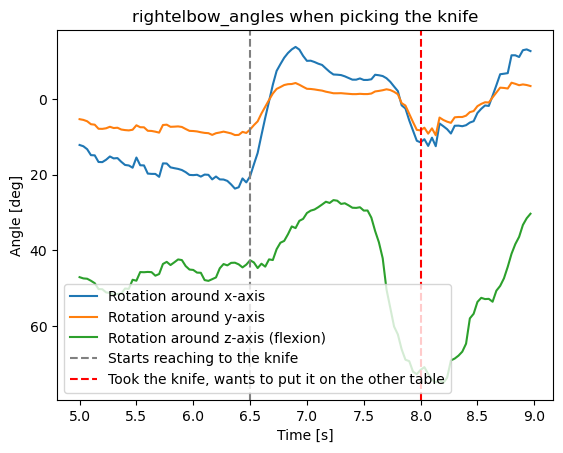

In [25]:
plot_angles(df, 5, 9, 'rightelbow_angles', event= 'picking the knife', 
            vertical_line1=True, x_vertical1=6.5, label_vertical1='Starts reaching to the knife',
            vertical_line2=True, x_vertical2=8, label_vertical2='Took the knife, wants to put it on the other table')

#### 4.1 Trunk flexion

In [26]:
idx = time_id(df, 93, 93.5)
df['trunk_angles'][idx[0]:idx[1]]

2790    [31.08428412322608, 80.27502036276893, 109.226...
2791    [29.936131579393557, 80.49143326523799, 109.19...
2792    [29.91345036517863, 80.49801465959496, 109.083...
2793    [30.978269954244936, 80.5624625816342, 109.518...
2794    [34.02018848362392, 77.93764815090272, 106.042...
2795    [30.512435514223895, 80.601057373285, 109.4129...
2796    [31.324960490259134, 80.44158976230507, 109.39...
2797    [32.718284999789894, 80.44332043894723, 109.83...
2798    [32.6380975268868, 80.3790064521061, 109.98438...
2799    [33.018593602980424, 80.48376161549257, 109.90...
2800    [33.21428900322508, 80.68146355693764, 110.806...
2801    [33.65450865041751, 80.11397879601476, 109.690...
2802    [34.008821108579454, 80.05992878217842, 109.72...
2803    [34.500112621888086, 80.0699288188628, 109.578...
2804    [34.62578598107056, 80.22809217108863, 109.939...
Name: trunk_angles, dtype: object

#### 4.2 Trunk rotation

### More plots 
#### Average joints velocities

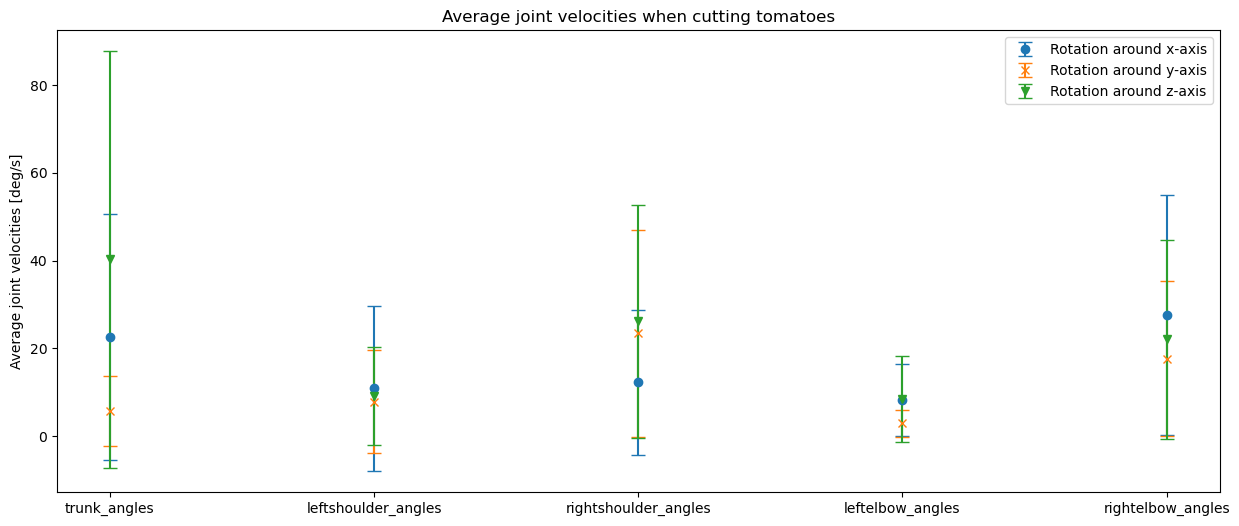

In [27]:
#during cutting events
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
plot_joint_velocities(df, t1, t2, event = 'cutting tomatoes')

One can see that the person is right handed when cutting the tomatoes, since there are higher joint velocities on right body side.

#### Trajectories
Let's plot the right wrist trajectory while cutting some tomatoes

In [28]:
""" Plots trajectory of a joint during an event. """
import plotly.express as px

def plot_trajectory(data, t1, t2, joint, event):
    idx = time_id(df, t1, t2)
    xdata = [point[0] for point in data[joint][idx[0]: idx[1]]]
    ydata = [point[1] for point in data[joint][idx[0]: idx[1]]]
    zdata = [point[2] for point in data[joint][idx[0]: idx[1]]]

    fig = px.line_3d(x = xdata, y = ydata, z = zdata)
    fig.show()
    """
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
    ax.set_title(f'{joint} trajectory when {event}')
    """
t1 = events['cutting'][0][0]
t2 = events['cutting'][0][1]
plot_trajectory(df, t1, t2, joint = 'rightwrist', event = 'cutting tomatoes')